Interacting with Web APIs
Problem Statement: Analyzing Weather Data from
OpenWeatherMap API. The goal is to interact with the
OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and
visualization to analyze weather patterns over time.

# Importing Necessary Libraries

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Importing & Reading Data from Openweathermap

In [21]:
API_key = '91dc4e027d565d766d090eec6efb196c'


countries = ['Japan' , 'Saudi Arabia' , 'United States of America' , 'Indonesia' , 'India' , 'Egypt']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

In [22]:
for country_names in countries:

    # url = f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=metric'
    url = f"https://api.openweathermap.org/data/2.5/weather?q={country_names}&appid={API_key}&units=metric"

    r = requests.get(url)
        
    data = r.json()
        
    formatted_json = json.dumps(data, sort_keys = True, indent = 4)
    
#     print(data)
    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])
            

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()    

,Names,Max_Temp,Min_Temp,Humidity,WindSpeed
0,Japan,19.93,16.57,76,4.63
1,Saudi Arabia,18.86,18.86,37,8.47
2,United States of America,15.23,15.23,28,4.83
3,Indonesia,22.41,22.41,84,1.24
4,Innichen,8.00,8.00,93,1.03


In [23]:
df

,Names,Max_Temp,Min_Temp,Humidity,WindSpeed
0,Japan,19.93,16.57,76,4.63
1,Saudi Arabia,18.86,18.86,37,8.47
2,United States of America,15.23,15.23,28,4.83
3,Indonesia,22.41,22.41,84,1.24
4,Innichen,8.00,8.00,93,1.03
5,Egypt,16.66,13.77,42,1.54


In [24]:
df.describe()

,Max_Temp,Min_Temp,Humidity,WindSpeed
count,6.000000,6.000000,6.000000,6.000000
mean,16.848333,15.806667,60.000000,3.623333
std,5.008455,4.877174,27.560842,2.922517
min,8.000000,8.000000,28.000000,1.030000
25%,15.587500,14.135000,38.250000,1.315000
50%,17.760000,15.900000,59.000000,3.085000
75%,19.662500,18.287500,82.000000,4.780000
max,22.410000,22.410000,93.000000,8.470000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      6 non-null      object 
 1   Max_Temp   6 non-null      float64
 2   Min_Temp   6 non-null      float64
 3   Humidity   6 non-null      int64  
 4   WindSpeed  6 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 372.0+ bytes


# Data Cleaning

In [26]:
df.isna().sum()

Names        0
Max_Temp     0
Min_Temp     0
Humidity     0
WindSpeed    0
dtype: int64

In [27]:
df.duplicated().sum()

0

# Data Analysis

In [28]:
average_temperature = df.groupby('Names')['Max_Temp'].mean()
average_temperature

Names
Egypt                       16.66
Indonesia                   22.41
Innichen                     8.00
Japan                       19.93
Saudi Arabia                18.86
United States of America    15.23
Name: Max_Temp, dtype: float64

In [11]:
average_temperature = df.groupby('Names')['Min_Temp'].mean()
average_temperature

Names
Egypt                       13.33
Indonesia                   21.41
Innichen                    10.04
Japan                       16.57
Saudi Arabia                18.86
United States of America    14.67
Name: Min_Temp, dtype: float64

# Data Visualization

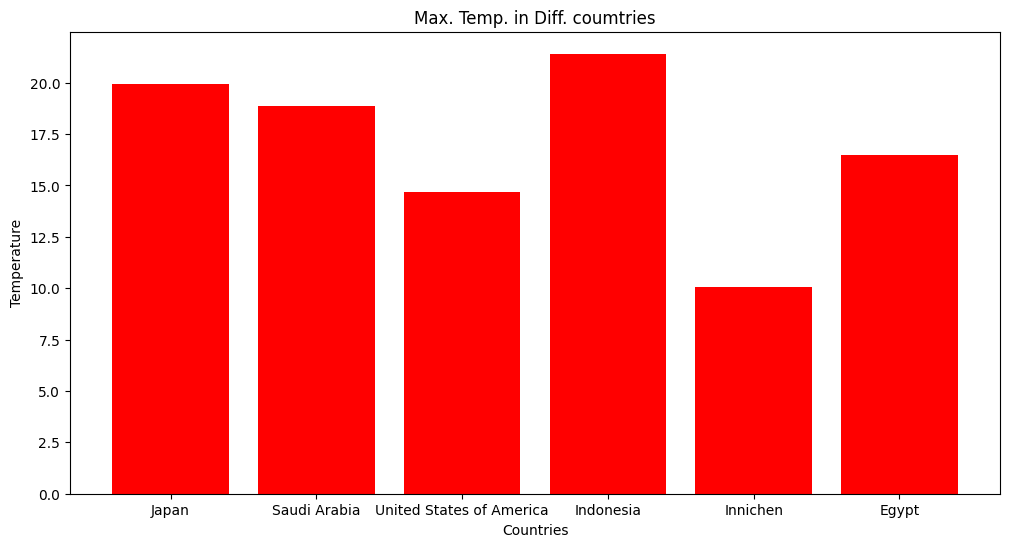

In [12]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Max_Temp'], color = 'red')
plt.title('Max. Temp. in Diff. coumtries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()

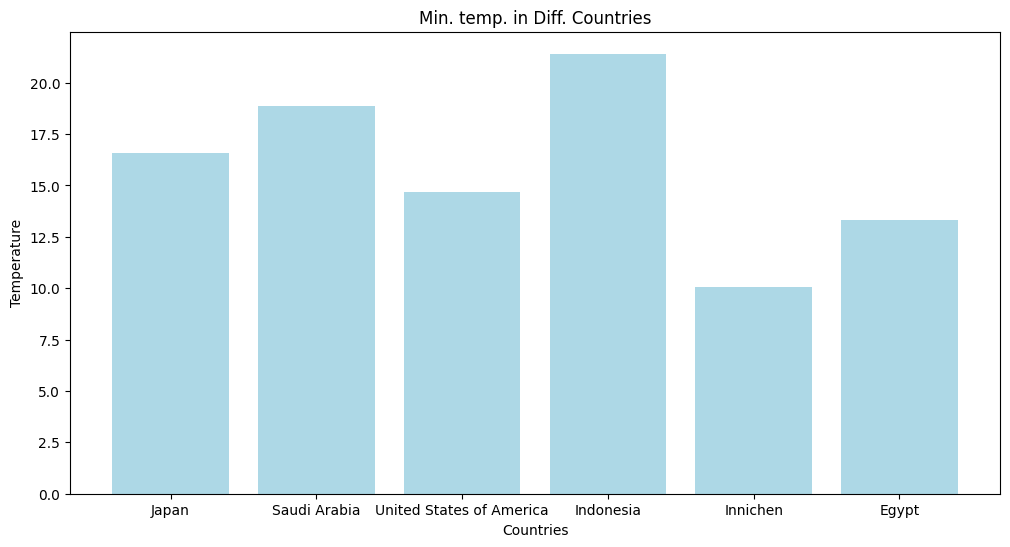

In [13]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Min_Temp'],color = 'lightblue')
plt.title('Min. temp. in Diff. Countries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()

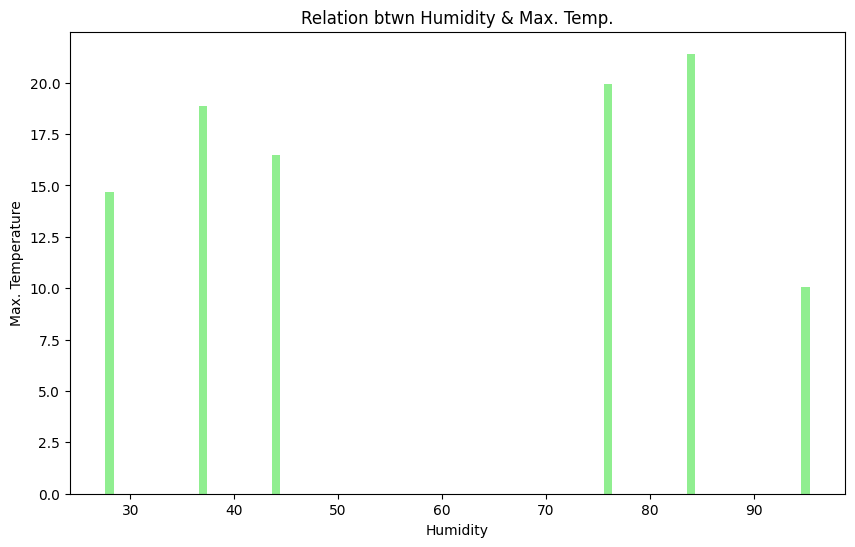

In [14]:
plt.figure(figsize=(10,6))
plt.bar(df['Humidity'],df['Max_Temp'],color='lightgreen')
plt.title('Relation btwn Humidity & Max. Temp.')
plt.xlabel('Humidity')
plt.ylabel('Max. Temperature')
plt.show()

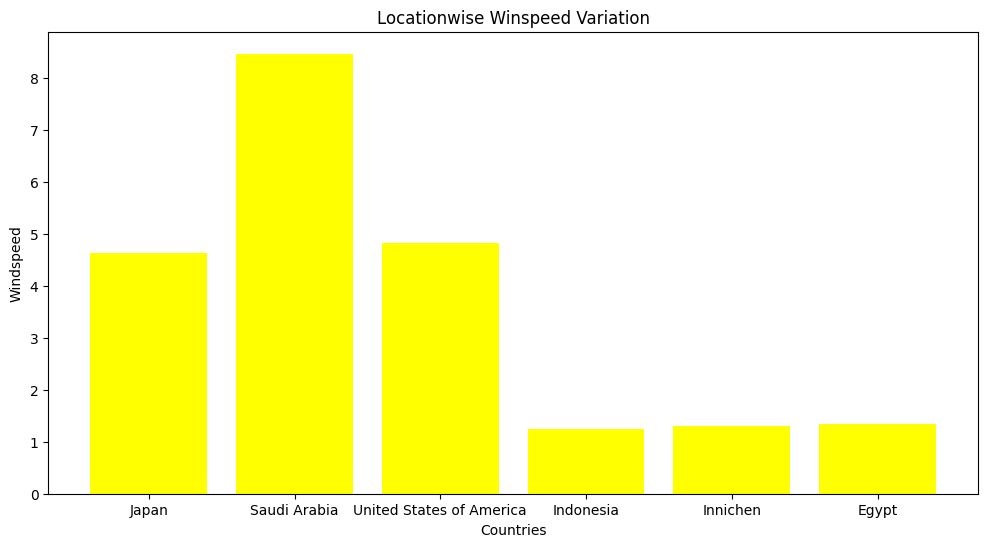

In [15]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['WindSpeed'],color='yellow')
plt.title('Locationwise Winspeed Variation')
plt.xlabel('Countries')
plt.ylabel('Windspeed')
plt.show()

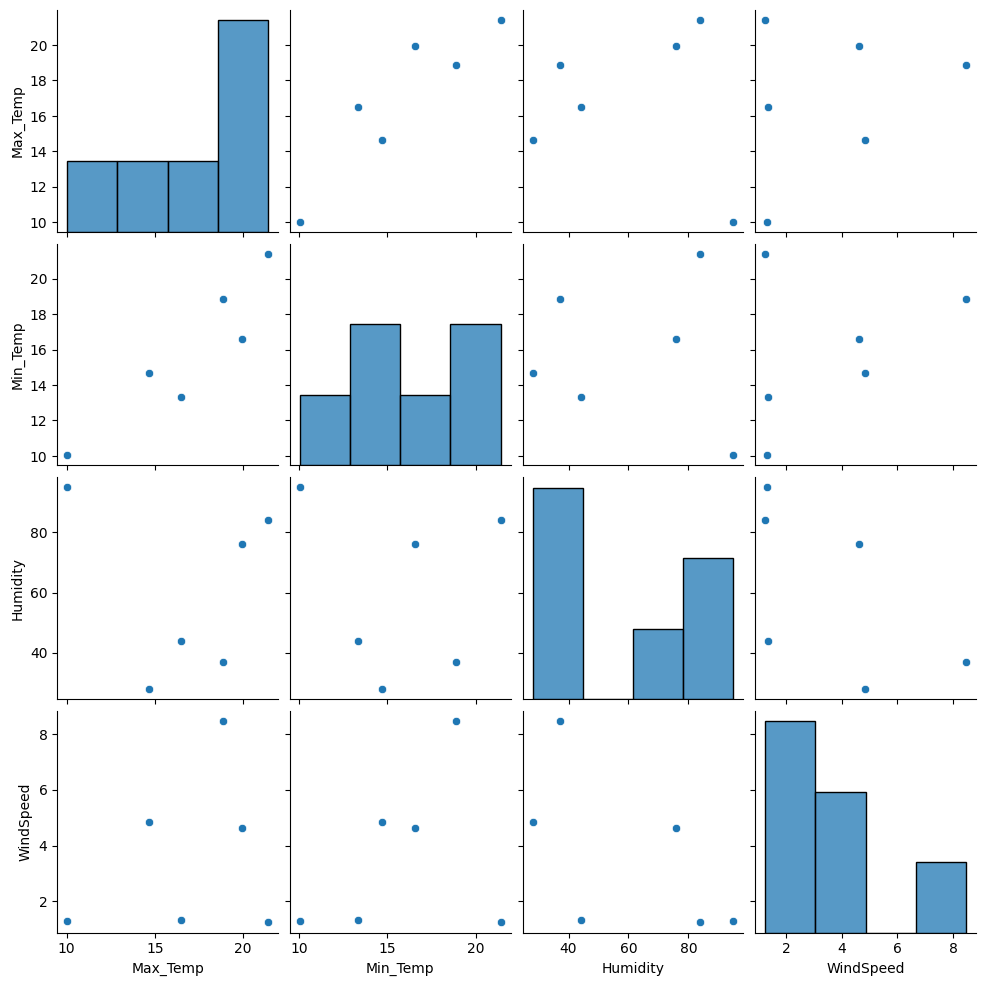

In [16]:
sns.pairplot(df)
plt.show()

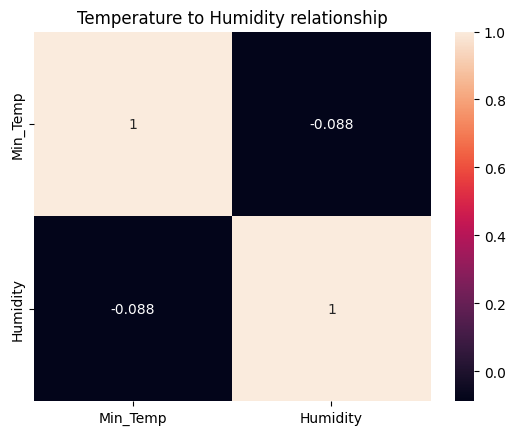

In [17]:
corre = df[['Min_Temp','Humidity']].corr()
sns.heatmap(corre, annot=True)
plt.title("Temperature to Humidity relationship")
plt.show()